In [1]:
import tensorflow as tf
import numpy as np
import csv
import os
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
with open('../data/mnist/train.csv', newline='') as csvfile:
    csv_file_object = csv.reader(csvfile, dialect='excel')
    header = csv_file_object.__next__()
    
    data=[]
    for row in csv_file_object:
        data.append(row)
    data = np.array(data)
    data = data.astype(np.float)

for x in np.nditer(data, op_flags=['readwrite']):
    x[...] = x / 256.

print(data.shape)

42000
(42000, 785)
[ 0.00390625  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.     

In [3]:
with open('../data/mnist/test.csv', newline='') as csvfile:
    csv_file_object = csv.reader(csvfile, dialect='excel')
    haeder = csv_file_object.__next__()
    
    test=[]
    for row in csv_file_object:
        test.append(row)
    test = np.array(test)
    test = test.astype(np.float)
    
for i in range(len(test)):
    for j in range(len(test[i])):
        test[i][j] = test[i][j] / 256.

print(test.shape)

(28000, 784)


In [4]:
# Define constants
NUM_CLASSES = 10
INPUT_SIZE = 784

BATCH_SIZE = 100
EVAL_BATCH_SIZE = 1

HIDDEN1_UNITS = 128
HIDDEN2_UNITS = 128

MAX_EPOCHS = 30

TRAIN_DIR = "./checkpoints"

In [5]:
# Inference Graph
def mnist_inference(image, hidden1_units, hidden2_units):
    """
    Args:
        image: Image placeholder
        hidden1_units: Size of the first hidden layer
        hidden2_units: Size of the second hidden layer
    Returns:
        logits: Output tensor with the computed logits
    """
    # Hidden 1
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
                tf.truncated_normal([INPUT_SIZE, hidden1_units],
                                    stddev=1.0 / math.sqrt(float(INPUT_SIZE))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]),
                             name='biases')
        hidden1 = tf.nn.relu(tf.matmul(image, weights) + biases)
    # Hidden 2
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
                tf.truncated_normal([hidden1_units, hidden2_units],
                                    stddev=1.0 / math.sqrt(float(hidden1_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]),
                             name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
    # Linear
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
                tf.truncated_normal([hidden2_units, NUM_CLASSES],
                                    stddev=1.0 / math.sqrt(float(hidden2_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]),
                             name='biases')
        logits = tf.matmul(hidden2, weights) + biases
        
    return logits

In [6]:
# Build training graph
def mnist_training(logits, labels, learning_rate):
    """
    Args:
        logits: Logits tensor, float - [BATCH_SIZE, NUM_CLASSES]
        labels: Labels tensor, int32 - [BATCH_SIZE]
        learning_rate: The learning rate to use for gradient descent
    Returns:
        train_op: The Op for training
        loss: The Op for calculating loss
    """
    labels = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits, labels, name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    global_step = tf.Variable(0, name='global_step', trainable=False)
    train_op = optimizer.minimize(loss, global_step=global_step)
    
    return train_op, loss

In [8]:
# Build complete graph
mnist_graph = tf.Graph()
with mnist_graph.as_default():
    # Generate placeholders for the images and labels
    inputs_placeholder = tf.placeholder(tf.float32)
    labels_placeholder = tf.placeholder(tf.int32)
    tf.add_to_collection("inputs", inputs_placeholder)
    tf.add_to_collection("labels", labels_placeholder)
    
    # Build a Graph that computes predictions from the inference model
    logits = mnist_inference(inputs_placeholder,
                             HIDDEN1_UNITS,
                             HIDDEN2_UNITS)
    tf.add_to_collection("logits", logits)
    
    # Add to graph the Ops that calculate and apply gradients
    train_op, loss = mnist_training(logits, labels_placeholder, 0.03)
    
    # Add the variable initializer Op
    init = tf.initialize_all_variables()
    
    # Create a saver for writing training checkpoints
    saver = tf.train.Saver()

Epoch 0: loss = 0.98
Epoch 1: loss = 0.36
Epoch 2: loss = 0.30
Epoch 3: loss = 0.27
Epoch 4: loss = 0.24
Epoch 5: loss = 0.22
Epoch 6: loss = 0.20
Epoch 7: loss = 0.18
Epoch 8: loss = 0.17
Epoch 9: loss = 0.15
Epoch 10: loss = 0.14
Epoch 11: loss = 0.13
Epoch 12: loss = 0.12
Epoch 13: loss = 0.12
Epoch 14: loss = 0.11
Epoch 15: loss = 0.10
Epoch 16: loss = 0.10
Epoch 17: loss = 0.09
Epoch 18: loss = 0.09
Epoch 19: loss = 0.08
Epoch 20: loss = 0.08
Epoch 21: loss = 0.07
Epoch 22: loss = 0.07
Epoch 23: loss = 0.07
Epoch 24: loss = 0.06
Epoch 25: loss = 0.06
Epoch 26: loss = 0.06
Epoch 27: loss = 0.06
Epoch 28: loss = 0.05
Epoch 29: loss = 0.05


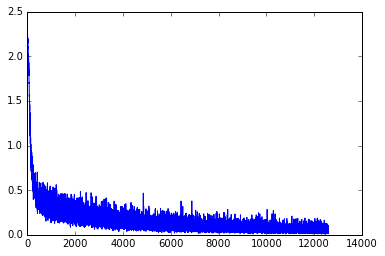

In [9]:
# Run training for MAX_STEPS and save checkpoint at the end
with tf.Session(graph=mnist_graph) as sess:
    # Run the Op to initialize variables
    sess.run(init)
    
    # Start the training loop
    losses = []
    for step in range(MAX_EPOCHS):
        # Generate batchs of image
        np.random.shuffle(data)
        remainder = len(data) % BATCH_SIZE
        if remainder != 0:
            epoch = data[:-(len(data) % BATCH_SIZE)]
        else:
            epoch = data
        batchs = np.split(epoch, len(epoch) / BATCH_SIZE)
        batchs_num = len(batchs)
        
        batch_loss = 0.
        for batch in batchs:
            images_feed = batch[0::, 1:]
            labels_feed = batch[0::, 0].astype(np.int)
            images_feed = np.array(images_feed)
            labels_feed = np.array(labels_feed)
        
            _, loss_value = sess.run([train_op, loss],
                                     feed_dict={inputs_placeholder: images_feed,
                                                labels_placeholder: labels_feed})
            
            batch_loss += loss_value / batchs_num
            losses.append(loss_value)
            
        print('Epoch %d: loss = %.2f' % (step, batch_loss))
        
    # Write a checkpoint
    checkpoint_file = os.path.join(TRAIN_DIR, 'checkpoint')
    saver.save(sess, checkpoint_file, global_step=step)
    plt.plot(losses)

prediction :  2


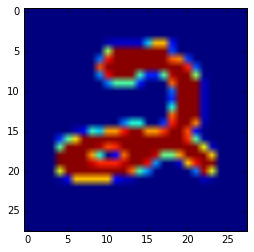

In [10]:
with tf.Session(graph=tf.Graph()) as sess:
    saver = tf.train.import_meta_graph(
        os.path.join(TRAIN_DIR, 'checkpoint-29.meta'))
    saver.restore(
        sess, os.path.join(TRAIN_DIR, 'checkpoint-29'))
    
    # Retrieve Ops
    logits = tf.get_collection('logits')[0]
    inputs_placeholder = tf.get_collection('inputs')[0]
    labels_placeholder = tf.get_collection('labels')[0]
    
    eval_op = tf.nn.top_k(logits)
    
    # Run evaluation
    inputs_feed = test
    labels_feed = test[0::, 0]
    labels_feed = np.array(labels_feed)
    imgplot = plt.imshow(np.reshape(inputs_feed[0], (28, 28)))
    
    prediction = sess.run(eval_op,
                          feed_dict={inputs_placeholder: inputs_feed,
                                    labels_placeholder: labels_feed})
    print('prediction : ', prediction.indices[0][0])

In [13]:
with open('simple_nn.csv', 'w', newline='') as csvfile:
    csv_file_object = csv.writer(csvfile, dialect='excel')
    csv_file_object.writerow(['ImageId', 'Label'])
    for i in range(len(test)):
        csv_file_object.writerow([i+1, prediction.indices[i][0]])